<a href="https://colab.research.google.com/github/mjgpinheiro/Econophysics/blob/main/Progress_Benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Barómetro de Progresso (com Índice de Meritocracia):
   Country_Name  Progress_Barometer  Progress_Ready  Economic_Score  \
6       Ireland            0.810453            True        0.939394   
11       Sweden            0.808233            True        0.494583   
12      Denmark            0.784786            True        0.647710   
10      Finland            0.777190            True        0.471359   
7   Netherlands            0.772512            True        0.631771   
2       Germany            0.687958            True        0.584372   
9       Austria            0.665558            True        0.561305   
8       Belgium            0.587119           False        0.499349   
3        France            0.482867           False        0.372917   
0      Portugal            0.305240           False        0.266049   
4         Italy            0.264685           False        0.303197   
1         Spain            0.249421           False        0.076453   
5        Greece        

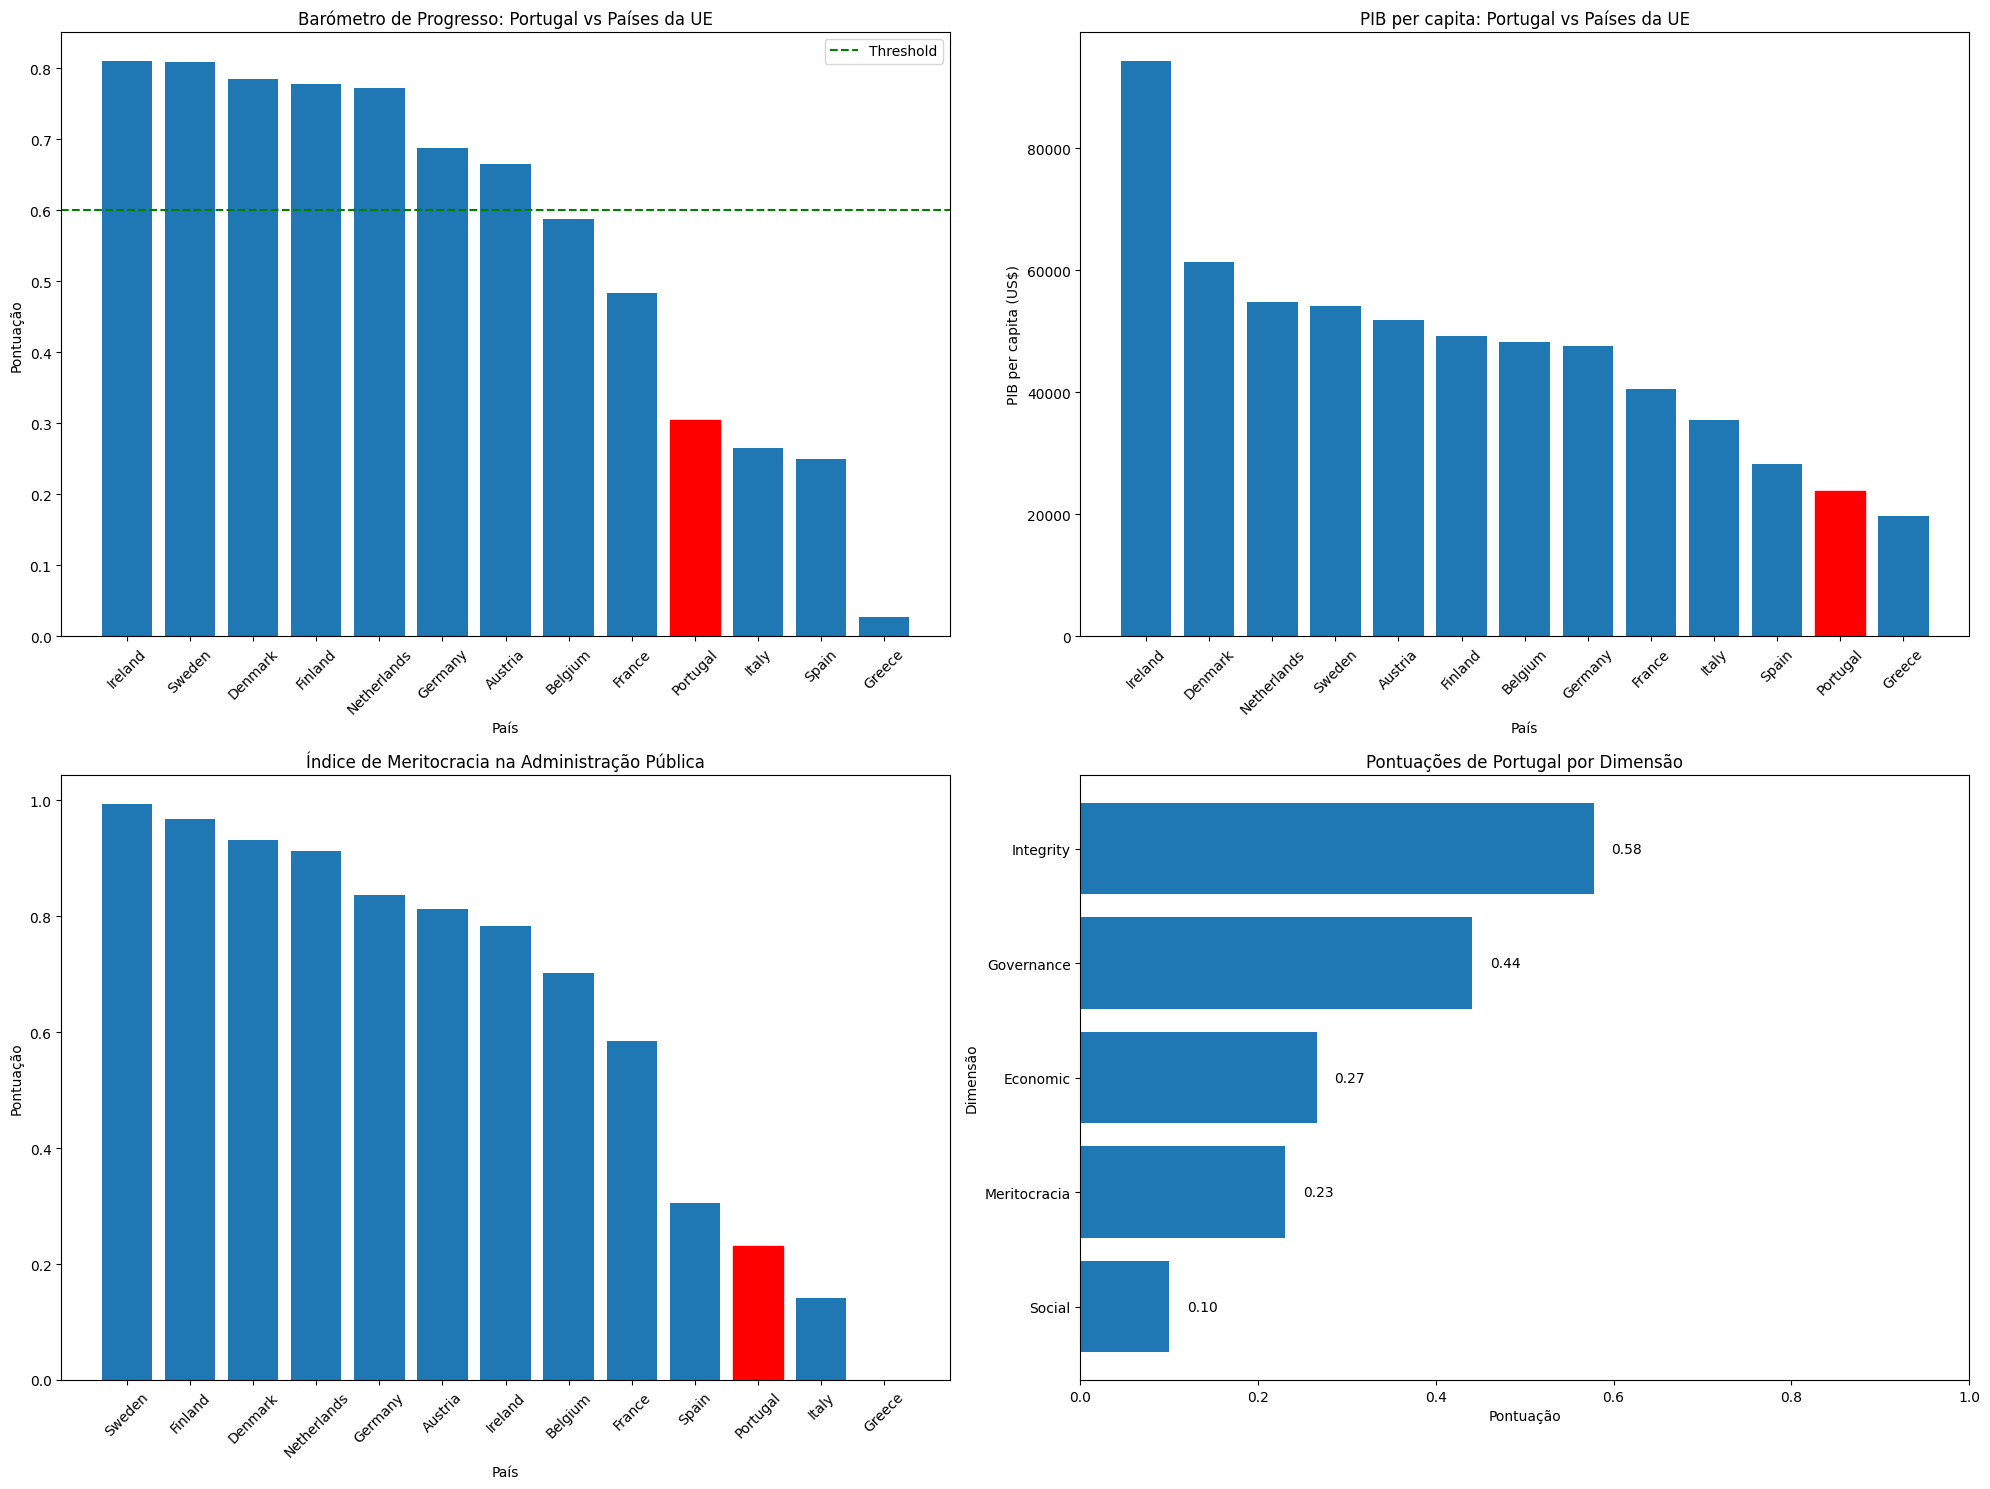

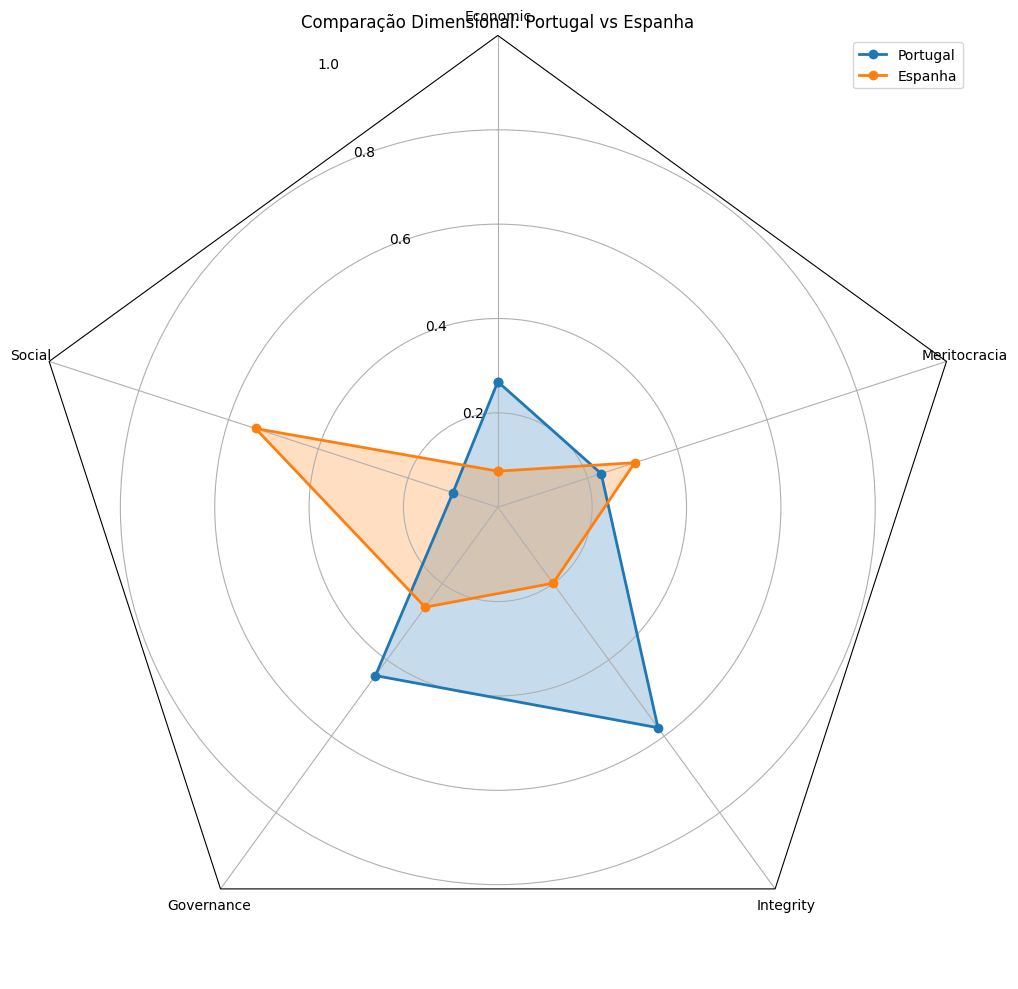

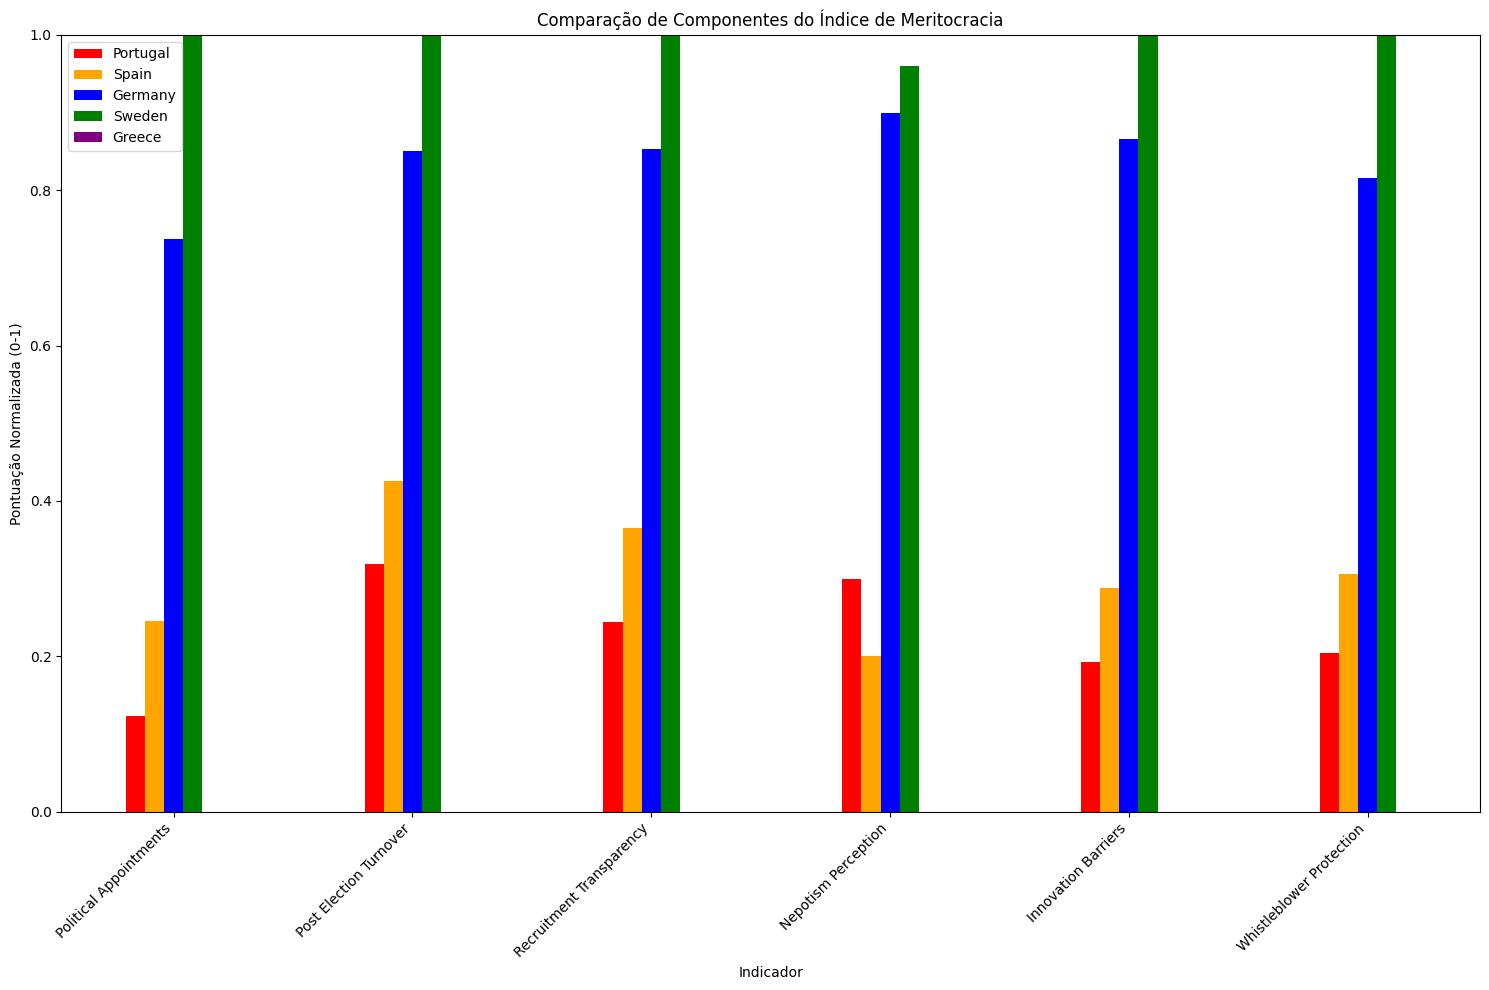

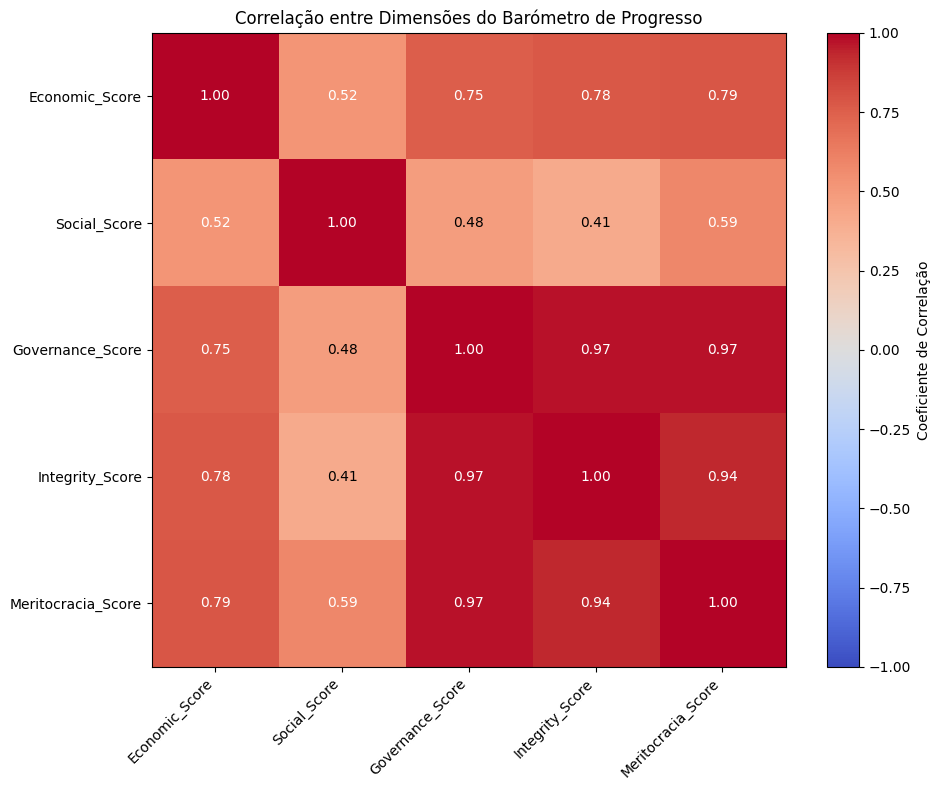


ANÁLISE DETALHADA DE PORTUGAL:
Barómetro de Progresso: 0.3052

Pontuações por Dimensão:
- Economic: 0.2660
- Social: 0.1000
- Governance: 0.4412
- Integrity: 0.5777
- Meritocracia: 0.2304

Componentes do Índice de Meritocracia:
- Political Appointments: 65.0 (normalizado: 0.1228) - pior que a média da UE
- Post Election Turnover: 40.0 (normalizado: 0.3191) - pior que a média da UE
- Recruitment Transparency: 65.0 (normalizado: 0.2439) - pior que a média da UE
- Nepotism Perception: 45.0 (normalizado: 0.3000) - pior que a média da UE
- Innovation Barriers: 60.0 (normalizado: 0.1923) - pior que a média da UE
- Whistleblower Protection: 55.0 (normalizado: 0.2041) - pior que a média da UE

IMPACTO DE MELHORIAS NA MERITOCRACIA:
Pontuação atual do Barómetro: 0.3052
Pontuação com melhoria de 20% na Meritocracia: 0.3552
Ganho total: 0.0500 (16.4%)
Nova posição potencial: #10 (subida de 0 posições)

Dados completos guardados em 'barometro_progresso_com_meritocracia.csv'
Visualizações guardadas

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
import warnings
warnings.filterwarnings('ignore')

# Define a function for radar chart
def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.
    """
    # Calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):
        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

# Define EU countries
eu_countries = ["PRT", "ESP", "DEU", "FRA", "ITA", "GRC", "IRL", "NLD", "BEL", "AUT", "FIN", "SWE", "DNK"]
country_names = {
    "PRT": "Portugal", "ESP": "Spain", "DEU": "Germany",
    "FRA": "France", "ITA": "Italy", "GRC": "Greece",
    "IRL": "Ireland", "NLD": "Netherlands", "BEL": "Belgium",
    "AUT": "Austria", "FIN": "Finland", "SWE": "Sweden", "DNK": "Denmark"
}

# Create static data for EU countries (2022 data, approximate values)
# Economic and social data
data = {
    "Country": eu_countries,
    "Country_Name": [country_names[code] for code in eu_countries],
    "Unemployment_Rate": [6.1, 12.9, 3.0, 7.4, 8.1, 12.6, 4.8, 3.5, 5.7, 4.8, 6.8, 7.4, 4.8],  # Percentage
    "GDP_Per_Capita": [23900, 28200, 47700, 40500, 35500, 19800, 94400, 54800, 48300, 51900, 49300, 54100, 61400],  # USD
    "GNI_Per_Capita": [23600, 28000, 47100, 40300, 35100, 19500, 92300, 54200, 47800, 51200, 48800, 53600, 60800],  # USD
    "Life_Expectancy": [81.6, 83.3, 81.1, 82.5, 83.6, 81.2, 82.8, 81.7, 81.9, 81.8, 82.0, 83.0, 81.6],  # Years
    "Education_Index": [0.79, 0.82, 0.94, 0.86, 0.84, 0.83, 0.91, 0.92, 0.89, 0.87, 0.93, 0.94, 0.92],  # 0-1 scale
}

# Governance data based on World Bank WGI
governance_data = {
    "Government_Effectiveness": [0.97, 0.77, 1.56, 1.24, 0.45, 0.25, 1.42, 1.84, 1.31, 1.54, 1.89, 1.77, 1.87],
    "Regulatory_Quality": [0.87, 0.74, 1.63, 1.17, 0.56, 0.28, 1.52, 1.86, 1.34, 1.42, 1.82, 1.72, 1.79],
    "Voice_Accountability": [1.24, 0.94, 1.38, 1.16, 0.88, 0.78, 1.31, 1.64, 1.33, 1.42, 1.65, 1.68, 1.62],
    "Control_of_Corruption": [0.85, 0.57, 1.84, 1.33, 0.25, 0.08, 1.52, 1.93, 1.43, 1.56, 2.22, 2.13, 2.07],
    "Rule_of_Law": [1.12, 0.85, 1.59, 1.41, 0.22, 0.15, 1.49, 1.83, 1.38, 1.85, 2.05, 1.92, 1.88],
    "Political_Stability": [1.03, 0.15, 0.83, 0.27, 0.40, 0.17, 1.14, 0.93, 0.71, 1.02, 1.17, 1.03, 1.00]
}

# Add governance data to the main data dictionary
for key, values in governance_data.items():
    data[key] = values

# New: Add Meritocracy Index components (synthetic data for demonstration)
meritocracy_data = {
    "Political_Appointments": [65, 58, 30, 45, 60, 72, 25, 20, 35, 28, 18, 15, 17],  # % of positions politically appointed (lower is better)
    "Post_Election_Turnover": [40, 35, 15, 25, 45, 55, 18, 12, 20, 15, 10, 8, 10],   # % of senior officials replaced after elections (lower is better)
    "Recruitment_Transparency": [65, 70, 90, 80, 60, 55, 88, 92, 85, 89, 95, 96, 93], # 0-100 scale (higher is better)
    "Nepotism_Perception": [45, 50, 15, 30, 55, 60, 20, 12, 25, 18, 10, 12, 15],     # % perceiving nepotism in public admin (lower is better)
    "Innovation_Barriers": [60, 55, 25, 40, 65, 70, 30, 25, 35, 30, 20, 18, 22],     # Index of barriers to innovation (lower is better)
    "Whistleblower_Protection": [55, 60, 85, 75, 50, 45, 80, 90, 80, 85, 92, 94, 90] # 0-100 scale (higher is better)
}

# Add meritocracy data to the main data dictionary
for key, values in meritocracy_data.items():
    data[key] = values

# Create DataFrame
eu_data = pd.DataFrame(data)

# Define indicator groups for calculation with added Meritocracy dimension
indicator_groups = {
    "Economic": [
        "GDP_Per_Capita",
        "GNI_Per_Capita",
        "Unemployment_Rate"
    ],
    "Social": [
        "Life_Expectancy",
        "Education_Index"
    ],
    "Governance": [
        "Government_Effectiveness",
        "Regulatory_Quality",
        "Voice_Accountability"
    ],
    "Integrity": [
        "Control_of_Corruption",
        "Rule_of_Law",
        "Political_Stability"
    ],
    "Meritocracia": [
        "Political_Appointments",
        "Post_Election_Turnover",
        "Recruitment_Transparency",
        "Nepotism_Perception",
        "Innovation_Barriers",
        "Whistleblower_Protection"
    ]
}

# Define weights for each group in the final index - adjusted to include Meritocracia
group_weights = {
    "Economic": 0.30,
    "Social": 0.15,
    "Governance": 0.15,
    "Integrity": 0.15,
    "Meritocracia": 0.25  # New dimension with significant weight
}

# Define reverse indicators (where lower values are better)
reverse_indicators = [
    "Unemployment_Rate",
    "Political_Appointments",
    "Post_Election_Turnover",
    "Nepotism_Perception",
    "Innovation_Barriers"
]

# Process the data
# Convert all indicators to 0-1 scale (higher is better)
for column in eu_data.columns:
    if column not in ["Country", "Country_Name"]:
        # Skip non-numeric columns
        eu_data[column] = pd.to_numeric(eu_data[column], errors='coerce')

        # Check if this is a reverse indicator (where lower values are better)
        if column in reverse_indicators:
            # Normalize and reverse (1 - normalized value)
            min_val = eu_data[column].min()
            max_val = eu_data[column].max()
            if max_val > min_val:  # Avoid division by zero
                eu_data[f"{column}_Normalized"] = 1 - ((eu_data[column] - min_val) / (max_val - min_val))
            else:
                eu_data[f"{column}_Normalized"] = 1  # If all values are the same
        else:
            # Normal normalization (higher values are better)
            min_val = eu_data[column].min()
            max_val = eu_data[column].max()
            if max_val > min_val:  # Avoid division by zero
                eu_data[f"{column}_Normalized"] = (eu_data[column] - min_val) / (max_val - min_val)
            else:
                eu_data[f"{column}_Normalized"] = 0  # If all values are the same

# Calculate group scores
for group_name, group_indicators in indicator_groups.items():
    # Initialize the group score column
    eu_data[f"{group_name}_Score"] = 0

    # Sum up the normalized indicator values
    for indicator_name in group_indicators:
        # Add to group score
        eu_data[f"{group_name}_Score"] += eu_data[f"{indicator_name}_Normalized"] / len(group_indicators)

# Calculate the Progress Barometer index with group weights
eu_data["Progress_Barometer"] = 0
for group_name, weight in group_weights.items():
    eu_data["Progress_Barometer"] += eu_data[f"{group_name}_Score"] * weight

# Set a threshold for progress readiness
threshold = 0.6  # Higher threshold for more stringent evaluation
eu_data["Progress_Ready"] = eu_data["Progress_Barometer"] > threshold

# Find Portugal's data
portugal_data = eu_data[eu_data["Country"] == "PRT"]

# Calculate percentage differences with Portugal
for group_name in indicator_groups.keys():
    eu_data[f"{group_name}_vs_PRT_%"] = ((eu_data[f"{group_name}_Score"] - portugal_data[f"{group_name}_Score"].values[0]) /
                                      portugal_data[f"{group_name}_Score"].values[0] * 100)

# Display the progress barometer data
print("\nBarómetro de Progresso (com Índice de Meritocracia):")
barometer_display = eu_data[["Country_Name", "Progress_Barometer", "Progress_Ready"] +
                          [f"{group}_Score" for group in indicator_groups.keys()]]

print(barometer_display.sort_values("Progress_Barometer", ascending=False))

# Find Portugal's rank
sorted_data = eu_data.sort_values("Progress_Barometer", ascending=False).reset_index(drop=True)
portugal_rank = sorted_data[sorted_data["Country"] == "PRT"].index[0] + 1
print(f"\nPortugal ocupa a posição #{portugal_rank} de {len(sorted_data)} países")
print(f"Pontuação de Portugal no Barómetro de Progresso: {portugal_data['Progress_Barometer'].values[0]:.4f}")
print(f"Portugal está {'ACIMA' if portugal_data['Progress_Ready'].values[0] else 'ABAIXO'} do limiar de {threshold}")

# Create visualizations
plt.figure(figsize=(20, 15))

# 1. Progress Barometer Visualization
plt.subplot(2, 2, 1)
barometer_sorted = eu_data.sort_values("Progress_Barometer", ascending=False)
bars = plt.bar(barometer_sorted["Country_Name"], barometer_sorted["Progress_Barometer"])

# Highlight Portugal
portugal_idx = barometer_sorted[barometer_sorted["Country"] == "PRT"].index[0]
portugal_pos = list(barometer_sorted.index).index(portugal_idx)
bars[portugal_pos].set_color("red")

plt.axhline(y=threshold, color="green", linestyle="--", label="Threshold")
plt.xlabel("País")
plt.ylabel("Pontuação")
plt.title("Barómetro de Progresso: Portugal vs Países da UE")
plt.xticks(rotation=45)
plt.legend()

# 2. GDP Per Capita Comparison
plt.subplot(2, 2, 2)
gdp_sorted = eu_data.sort_values("GDP_Per_Capita", ascending=False)
bars = plt.bar(gdp_sorted["Country_Name"], gdp_sorted["GDP_Per_Capita"])

# Highlight Portugal
portugal_idx = gdp_sorted[gdp_sorted["Country"] == "PRT"].index[0]
portugal_pos = list(gdp_sorted.index).index(portugal_idx)
bars[portugal_pos].set_color("red")

plt.xlabel("País")
plt.ylabel("PIB per capita (US$)")
plt.title("PIB per capita: Portugal vs Países da UE")
plt.xticks(rotation=45)

# 3. Meritocracy Index Comparison (New)
plt.subplot(2, 2, 3)
meritocracy_sorted = eu_data.sort_values("Meritocracia_Score", ascending=False)
bars = plt.bar(meritocracy_sorted["Country_Name"], meritocracy_sorted["Meritocracia_Score"])

# Highlight Portugal
portugal_idx = meritocracy_sorted[meritocracy_sorted["Country"] == "PRT"].index[0]
portugal_pos = list(meritocracy_sorted.index).index(portugal_idx)
bars[portugal_pos].set_color("red")

plt.xlabel("País")
plt.ylabel("Pontuação")
plt.title("Índice de Meritocracia na Administração Pública")
plt.xticks(rotation=45)

# 4. Dimension comparison for Portugal
plt.subplot(2, 2, 4)
dimensions = list(indicator_groups.keys())
portugal_scores = [portugal_data[f"{dim}_Score"].values[0] for dim in dimensions]

# Sort dimensions by score for better visualization
sorted_indices = np.argsort(portugal_scores)
sorted_dimensions = [dimensions[i] for i in sorted_indices]
sorted_scores = [portugal_scores[i] for i in sorted_indices]

bars = plt.barh(sorted_dimensions, sorted_scores)
plt.xlabel("Pontuação")
plt.ylabel("Dimensão")
plt.title("Pontuações de Portugal por Dimensão")
plt.xlim(0, 1)

# Add value labels
for i, v in enumerate(sorted_scores):
    plt.text(v + 0.02, i, f"{v:.2f}", va='center')

plt.tight_layout()
plt.savefig("portugal_progress_barometer_com_meritocracia.png", dpi=300, bbox_inches="tight")
plt.show()

# Create a detailed radar chart comparing Portugal with Spain
plt.figure(figsize=(12, 10))

# Get Spain data
spain_data = eu_data[eu_data["Country"] == "ESP"]

# Create radar chart
categories = list(indicator_groups.keys())
N = len(categories)

# Create theta for radar chart
theta = radar_factory(N, frame='polygon')

# Create the subplot with radar projection
ax = plt.subplot(111, projection='radar')

# Format the data for the radar chart
values_portugal = [portugal_data[f"{cat}_Score"].values[0] for cat in categories]
values_spain = [spain_data[f"{cat}_Score"].values[0] for cat in categories]

# Plot the radar chart
ax.plot(theta, values_portugal, 'o-', linewidth=2, label='Portugal')
ax.fill(theta, values_portugal, alpha=0.25)
ax.plot(theta, values_spain, 'o-', linewidth=2, label='Espanha')
ax.fill(theta, values_spain, alpha=0.25)

ax.set_varlabels(categories)
ax.set_ylim(0, 1)
plt.legend(loc='upper right')
plt.title("Comparação Dimensional: Portugal vs Espanha")

plt.tight_layout()
plt.savefig("portugal_spain_dimension_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

# Create a detailed breakdown of the Meritocracy Index
plt.figure(figsize=(15, 10))

# Get the meritocracy indicators
meritocracy_indicators = indicator_groups["Meritocracia"]
meritocracy_labels = [ind.replace("_", " ") for ind in meritocracy_indicators]

# Get data for all countries
x = np.arange(len(meritocracy_indicators))
width = 0.08  # Width of bars

# Create a multi-bar chart for selected countries
selected_countries = ["PRT", "ESP", "DEU", "SWE", "GRC"]
colors = ["red", "orange", "blue", "green", "purple"]

for i, country in enumerate(selected_countries):
    country_data = eu_data[eu_data["Country"] == country]
    values = [country_data[f"{ind}_Normalized"].values[0] for ind in meritocracy_indicators]
    plt.bar(x + (i - 2) * width, values, width, label=country_names[country], color=colors[i])

plt.xlabel('Indicador')
plt.ylabel('Pontuação Normalizada (0-1)')
plt.title('Comparação de Componentes do Índice de Meritocracia')
plt.xticks(x, meritocracy_labels, rotation=45, ha='right')
plt.legend()
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig("meritocracy_components_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

# Create a correlation matrix to show how Meritocracy correlates with other dimensions
corr_data = eu_data[[f"{group}_Score" for group in indicator_groups.keys()]].corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr_data, cmap='coolwarm', vmin=-1, vmax=1)

# Add correlation values
for i in range(len(corr_data.columns)):
    for j in range(len(corr_data.columns)):
        plt.text(j, i, f"{corr_data.iloc[i, j]:.2f}", ha='center', va='center',
                color='white' if abs(corr_data.iloc[i, j]) > 0.5 else 'black')

plt.colorbar(label='Coeficiente de Correlação')
plt.xticks(range(len(corr_data.columns)), corr_data.columns, rotation=45, ha='right')
plt.yticks(range(len(corr_data.columns)), corr_data.columns)
plt.title('Correlação entre Dimensões do Barómetro de Progresso')
plt.tight_layout()
plt.savefig("dimension_correlation.png", dpi=300, bbox_inches="tight")
plt.show()

# Print summary for Portugal with focus on Meritocracy
print("\nANÁLISE DETALHADA DE PORTUGAL:")
print(f"Barómetro de Progresso: {portugal_data['Progress_Barometer'].values[0]:.4f}")

print("\nPontuações por Dimensão:")
for dim in indicator_groups.keys():
    print(f"- {dim}: {portugal_data[f'{dim}_Score'].values[0]:.4f}")

print("\nComponentes do Índice de Meritocracia:")
for ind in indicator_groups["Meritocracia"]:
    raw_value = portugal_data[ind].values[0]
    norm_value = portugal_data[f"{ind}_Normalized"].values[0]
    indicator_name = ind.replace("_", " ")

    if ind in reverse_indicators:
        better_or_worse = "melhor" if raw_value < eu_data[ind].mean() else "pior"
    else:
        better_or_worse = "melhor" if raw_value > eu_data[ind].mean() else "pior"

    print(f"- {indicator_name}: {raw_value:.1f} (normalizado: {norm_value:.4f}) - {better_or_worse} que a média da UE")

# Calculate the impact of improving Meritocracy on overall score
improved_meritocracy = portugal_data["Meritocracia_Score"].values[0] + 0.2  # Assume 20% improvement
if improved_meritocracy > 1:
    improved_meritocracy = 1  # Cap at maximum value

current_score = portugal_data["Progress_Barometer"].values[0]
improved_score = current_score - (group_weights["Meritocracia"] * portugal_data["Meritocracia_Score"].values[0]) + (group_weights["Meritocracia"] * improved_meritocracy)

print(f"\nIMPACTO DE MELHORIAS NA MERITOCRACIA:")
print(f"Pontuação atual do Barómetro: {current_score:.4f}")
print(f"Pontuação com melhoria de 20% na Meritocracia: {improved_score:.4f}")
print(f"Ganho total: {(improved_score - current_score):.4f} ({(improved_score - current_score) / current_score * 100:.1f}%)")

new_rank = 0
for i, row in sorted_data.iterrows():
    if improved_score > row["Progress_Barometer"]:
        new_rank = i
        break
if new_rank == 0:
    new_rank = len(sorted_data)
else:
    new_rank += 1

print(f"Nova posição potencial: #{new_rank} (subida de {portugal_rank - new_rank} posições)")

# Save the data to CSV
eu_data.to_csv("barometro_progresso_com_meritocracia.csv", index=False)
print("\nDados completos guardados em 'barometro_progresso_com_meritocracia.csv'")
print("Visualizações guardadas em ficheiros PNG")